In [188]:
#PART-A
#1. Generate polynomial and interaction features for a given degree of the polynomial
import itertools
import numpy as np
from matplotlib import pyplot as plt
def polynomialFeatures(X, degree):   
    X_poly=list()
    #index=0
    for row in X:
        #index+=1 
        #print(index)
        for i in range(1,degree+1):
            
            for j in itertools.combinations_with_replacement(row, i):
            
                X_poly.append(np.product(j))
                
    X_poly=np.array(X_poly).reshape(X.shape[0],-1)
    return X_poly


polynomialFeatures(np.array([[1, 2, 3,4,5],[5,6,7,8,9],[7,8,9,10,11],[11,12,13,14,5]]),2)

array([[  1,   2,   3,   4,   5,   1,   2,   3,   4,   5,   4,   6,   8,
         10,   9,  12,  15,  16,  20,  25],
       [  5,   6,   7,   8,   9,  25,  30,  35,  40,  45,  36,  42,  48,
         54,  49,  56,  63,  64,  72,  81],
       [  7,   8,   9,  10,  11,  49,  56,  63,  70,  77,  64,  72,  80,
         88,  81,  90,  99, 100, 110, 121],
       [ 11,  12,  13,  14,   5, 121, 132, 143, 154,  55, 144, 156, 168,
         60, 169, 182,  65, 196,  70,  25]])

In [6]:
#2 MSE

def MSE(Y_true,Y_pred):
    return (Y_true-Y_pred).T.dot(Y_true-Y_pred)/Y_true.shape[0]


In [269]:
#3 plot polynomial model complexity
def plot_polynomial_model_complexity(model, X, Y, cv, maxPolynomialDegree=5, learning_rate=None,
                                  epochs=None, tol=None, regularizer=None, lambd=None, **kwargs):
    validrmselist=list()
    trainrmselist=list()
    degrees=list()
    for degree in range(1,maxPolynomialDegree+1):
        degrees.append(degree)
        X_train_poly=polynomialFeatures(X_train,degree)
        X_test_poly=np.zeros((X_train_poly.shape[0],X_train_poly.shape[1]))
        X_train_polyfit, X_test_polyfit=standardize_data(X_train_poly,X_test_poly)

        LR=linearRegression(learningrate=learning_rate, epochs=epochs, tol=tol, regularizer="L2", lambd=lambd)
        LR.fit(X_train_polyfit,y_train)
        y_predict= LR.predict(X_train_polyfit)
        mse=MSE(y_train,y_predict)
        rmse=np.sqrt(mse)
        trainrmselist.append(rmse)
        
        linreg=linearRegression(learningrate=learning_rate, epochs=epochs, tol=tol, regularizer="L2", lambd=lambd)
        pred, true, trainrmse, validrmse =kFold(cv,X_train_polyfit,y_train,linreg,"rmse")
        validrmselist.append(validrmse)
        

    print(validrmselist)
    print(trainrmselist)
    #print(degrees)
    Validmse = plt.plot(degrees,validrmselist, label='Valiation Data RMSE')
    Trainmse = plt.plot(degrees,trainrmselist, label='Training Data RMSE')
    plt.legend()
    plt.title("Polynomial Model Complexity")
    plt.xlabel("Degree")
    plt.ylabel("RMSE")
    plt.show()
    
        

In [216]:
#4 Linear Regression model
class linearRegression():
    def __init__(self,learningrate=None, epochs=None,tol=None,regularizer=None,lambd=None,**kwargs):
        self.learningrate=learningrate
        self.epochs=epochs
        self.tol=tol
        self.regularizer=regularizer
        self.lambd=lambd
        self.kwargs=kwargs
        
    
    def fit(self,X,y):
        m,d=X.shape
        theta_hat=np.zeros(d)
        newJ=0
        if self.regularizer=="L1":
                
            for i in range(self.epochs):
                theta_hat_regularized=theta_hat.copy()
                theta_hat_regularized[0]=0
                theta_hat=theta_hat-(self.learningrate/m)*X.T.dot(X.dot(theta_hat)-y)-((self.learningrate*self.lambd)/m)*(np.sign(theta_hat_regularized))
                previousJ=newJ
                newJ=(1/(2*m))*(y-X.dot(theta_hat)).T.dot(y-X.dot(theta_hat))+(self.lambd/(2*m))*np.sum(np.abs(theta_hat_regularized))
                if abs(newJ-previousJ) < self.tol:
                    break

        elif self.regularizer=="L2":
                
            for i in range(self.epochs):
                theta_hat_regularized=theta_hat.copy()
                theta_hat_regularized[0]=0
                theta_hat=theta_hat-(self.learningrate/m)*np.dot(X.T,np.dot(X,theta_hat)-y)-(self.learningrate*self.lambd/m)*(theta_hat_regularized)
                previousJ=newJ
                newJ=(1/(2*m))*(y-X.dot(theta_hat)).T.dot(y-X.dot(theta_hat))+(self.lambd/(2*m))*np.sum((theta_hat_regularized)**2)
                if abs(newJ-previousJ) < self.tol:
                    break

        elif self.regularizer=="none":

            for i in range(self.epochs):
                theta_hat=theta_hat-(self.learningrate/m)*np.dot(X.T,np.dot(X,theta_hat)-y)
                previousJ=newJ;
                newJ=(1/(2*m))*(y-X.dot(theta_hat)).T.dot(y-X.dot(theta_hat))
        
        self.theta=theta_hat        
        
    def predict(self,X):
        Y=X.dot(self.theta)
        return Y


In [1]:
#PART-B
#5 read in data
import pandas as pd
df=pd.read_csv(r'C:\Users\Sanjay Alamuru\Downloads\winequality-red.csv',sep=";")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [2]:
#6 Use the techniques from the recitation to summarize each of the variables in the dataset in 
#terms of mean, standard deviation, and quartiles. Include this in your report.

df.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [30]:
#7. Shuffle the rows of your data. You can use def = df.sample(frac=1) 
#as an idiomatic way to shuffle the data in Pandas without losing column names.
#Create a test dataset by randomly sampling 20% of the data. Remaining data should be used for training.
import numpy as np
df.sample(frac=1)

X = np.array(df.drop( "quality", axis = 1))
y = np.array(df['quality'])

import math

def partition(X, y, t):
    part = math.trunc(t * len(y))
    y_test = y[0:part]
    y_train = y[part:len(y)]
    X_test = X[0:part]
    X_train = X[part:len(y)]
    return X_train, X_test, y_train, y_test
    
X_train, X_test, y_train, y_test = partition(X,y,0.2)

X_train, y_train

(array([[ 9.6  ,  0.77 ,  0.12 , ...,  3.3  ,  0.64 , 10.4  ],
        [ 9.8  ,  0.66 ,  0.39 , ...,  3.37 ,  0.71 , 11.5  ],
        [ 9.3  ,  0.61 ,  0.26 , ...,  3.24 ,  0.62 ,  9.7  ],
        ...,
        [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
        [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
        [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]]),
 array([6, 7, 5, ..., 6, 5, 6], dtype=int64))

In [205]:
#PART-C
#8 Standardizing the data
X_train_poly=polynomialFeatures(X_train,1)
X_test_poly=polynomialFeatures(X_test,1)
def standardize_data(x_train,x_test):
    for i in range(x_train.shape[1]):
        mean=np.mean(x_train[:,i])
        std=np.std(x_train[:,i])
        x_train[:,i]=(x_train[:,i]-mean)/std
        x_test[:,i]=(x_test[:,i]-mean)/std
    x_train=np.insert(x_train,0,1.0,axis=1)
    x_test=np.insert(x_test,0,1.0,axis=1)
    return x_train, x_test

#print(standardize_data(X_train_poly,X_test_poly))
X_train_poly,X_test_poly=standardize_data(X_train_poly,X_test_poly)
#print(X_train_poly)

In [241]:
#8. cross-fold validation function
import tabulate
def partition_data(data,folds):
    
    split_idx=int(data.shape[0]/folds)
    idx=[]
    indexes= np.arange(0,data.shape[0])
    
    for f in range(folds):
        
        test = indexes[:split_idx]
        train = indexes[split_idx:]
        i=np.arange(0,split_idx)
        indexes=np.delete(indexes,i)        
        indexes=np.append(indexes,test)
        idx.append((train,test))
        
    return np.asarray(idx)

def kFold(folds, X, y, model, error_function,**model_args):
    split_folds=partition_data(X,folds)
    test_error = []
    true_label = []
    pred_label = []
    train_error = []
    
    for train_index, test_index in split_folds:
        X_t, X_te = X[train_index], X[test_index]
        y_t, y_te = y[train_index], y[test_index]
        
        learning_rate_init, epoch_init , tol_init, regularizer_init, lambd_init  = 0.001, 1000, None,None,0.0 
        
        
        for key, value in model_args.items(): 
            
            if key=='learningrate':
                learning_rate_init=value
            if key=='epochs':
                epoch_init=value
            if key=='tol':
                tol_init=value
            if key=="regularizer":
                regularizer_init=value
            if key=="lambd":
                lambd_init=value
                
            if key == "degree":
                degree_init = value
            
        
        model.fit(X_t, y_t)#, learningrate = learning_rate_init, epochs= epoch_init, tol = tol_init,
                  #regularizer = regularizer_init,lambd = lambd_init)
        
        
        
        y_test_pred=model.predict( X_te)
        y_train_pred = model.predict( X_t)
            
     
        

        true_label.append(y_te)
        pred_label.append(y_test_pred)
        
        if error_function == "mse":
            
            avg_test_error = MSE(y_test_pred, y_te)
            avg_train_error = MSE(y_train_pred, y_t)
            
        elif error_function == "rmse":
            avg_test_error = np.sqrt(MSE(y_test_pred, y_te))
            avg_train_error = np.sqrt(MSE(y_train_pred, y_t))
        
        test_error.append(avg_test_error)
        train_error.append(avg_train_error)
    
    
    return np.array(pred_label), np.array(true_label), np.mean(np.array(train_error)), np.mean(np.array(test_error))



def mydictionary(lamb, learnrate, regular):
    mydict={'lamb':[],'learningrate':[],'regularizer':[],'mse':[]}
    mylist=[]
    for l in lamb:
        for lr in learnrate:
            for r in regular:
                linreg=linearRegression(learningrate=lr,epochs=10000,tol=1e-6,regularizer=r,lambd=l)
                pred, true, trainmse, validmse =kFold(5,X_train_poly,y_train,linreg,"mse")
                mydict={'lambd':l,'learningrate':lr,'regularizer':r,'mse':validmse}
                mydict_copy=mydict.copy()
                mylist.append(mydict_copy)
    header=mylist[0].keys()
    rows= [x.values() for x in mylist]
    print(tabulate.tabulate(rows,header,tablefmt='grid'))
lamb=[1.0,0.1,0.01, 0.001, 0.0001]
learnrate= [0.1, 0.01, 0.001, 0.0001]
regular=["L1","L2"]
mydictionary(lamb,learnrate,regular)

+---------+----------------+---------------+----------+
|   lambd |   learningrate | regularizer   |      mse |
+=========+================+===============+==========+
|  1      |         0.1    | L1            | 0.437952 |
+---------+----------------+---------------+----------+
|  1      |         0.1    | L2            | 0.438452 |
+---------+----------------+---------------+----------+
|  1      |         0.01   | L1            | 0.439262 |
+---------+----------------+---------------+----------+
|  1      |         0.01   | L2            | 0.439458 |
+---------+----------------+---------------+----------+
|  1      |         0.001  | L1            | 0.445977 |
+---------+----------------+---------------+----------+
|  1      |         0.001  | L2            | 0.446188 |
+---------+----------------+---------------+----------+
|  1      |         0.0001 | L1            | 6.88483  |
+---------+----------------+---------------+----------+
|  1      |         0.0001 | L2            | 6.8

with lambda of 1 and learning rate 0.1 with L1 regularization we get the best mse at 0.437952

In [267]:
#9Evaluate your model on the test data and report the mean squared error.

#Batch GD on test data with L1(Lasso)
linreg=linearRegression(learningrate=0.1,epochs=10000,tol=1e-6,regularizer="L1",lambd=1.0)
linreg.fit(X_train_poly,y_train)
y_predl1=linreg.predict(X_test_poly)
testmsel1=MSE(y_test,y_predl1)
testrmsel1=np.sqrt(testmsel1)

#Batch GD on test data with L2(Ridge)
linreg=linearRegression(learningrate=0.1,epochs=10000,tol=1e-6,regularizer="L2",lambd=1.0)
linreg.fit(X_train_poly,y_train)
y_predl2=linreg.predict(X_test_poly)
testmsel2=MSE(y_test,y_predl2)
testrmsel2=np.sqrt(testmsel2)


testmsel1, testmsel2

(0.4436356676056648, 0.44331808342582113)

We used L1 regularization with lambda=1 and learning rate 0.1 to get a test mse of 0.443

In [253]:
#10 Determinethe best model hyperparameter values for the training data matrix with polynomial degree 3.
import tabulate
lamb=[1.0,0.1,0.01, 0.001, 0.0001]
learnrate= [0.1, 0.01, 0.001, 0.001]
regular=["L1","L2"]
X_train_poly3=polynomialFeatures(X_train,3)
X_test_poly3=polynomialFeatures(X_test,3)
X_train_poly3,X_test_poly3=standardize_data(X_train_poly3,X_test_poly3)
mydict={'lamb':[],'learningrate':[],'regularizer':[],'mse':[]}
mylist=[]
for l in lamb:
    for lr in learnrate:
        for r in regular:
            linreg=linearRegression(learningrate=lr,epochs=10000,tol=1e-6,regularizer=r,lambd=l)
            pred, true, trainmse, validmse =kFold(5,X_train_poly3,y_train,linreg,"mse")
            mydict={'lambd':l,'learningrate':lr,'regularizer':r,'mse':validmse}
            mydict_copy=mydict.copy()
            mylist.append(mydict_copy)

validmselist=list()
bestvalidmse=list()
for i in range(len(mylist)):
    validmselist.append(mylist[i]['mse'])
bestvalidmse.append(np.nanmin(validmselist))
header=mylist[0].keys()
rows= [x.values() for x in mylist]
print(tabulate.tabulate(rows,header,tablefmt='grid'))
print("Best Validation MSE is", bestvalidmse)


<ipython-input-216-9b626dfccb00>:24: RuntimeWarning: invalid value encountered in double_scalars
  if abs(newJ-previousJ) < self.tol:
<ipython-input-216-9b626dfccb00>:35: RuntimeWarning: invalid value encountered in double_scalars
  if abs(newJ-previousJ) < self.tol:
<ipython-input-216-9b626dfccb00>:34: RuntimeWarning: overflow encountered in square
  newJ=(1/(2*m))*(y-X.dot(theta_hat)).T.dot(y-X.dot(theta_hat))+(self.lambd/(2*m))*np.sum((theta_hat_regularized)**2)


+---------+----------------+---------------+------------+
|   lambd |   learningrate | regularizer   |        mse |
+=========+================+===============+============+
|  1      |          0.1   | L1            | nan        |
+---------+----------------+---------------+------------+
|  1      |          0.1   | L2            | nan        |
+---------+----------------+---------------+------------+
|  1      |          0.01  | L1            |   0.500965 |
+---------+----------------+---------------+------------+
|  1      |          0.01  | L2            |   0.522798 |
+---------+----------------+---------------+------------+
|  1      |          0.001 | L1            |   0.782414 |
+---------+----------------+---------------+------------+
|  1      |          0.001 | L2            |   0.843326 |
+---------+----------------+---------------+------------+
|  1      |          0.001 | L1            |   0.782414 |
+---------+----------------+---------------+------------+
|  1      |   

Best Hyperparameters with MSE 0.50096454455533348 are Lambda=1.0,Learning rate=0.01 and Regularizer=L1(Lasso)

[0.6672805699580489, 0.6820399390797712, 0.8787807606799456, 1.9380505076373915, 7.0983765665249]
[0.6483550615154801, 0.6314778245780721, 0.6139848904608785, 0.5975411680110693, 0.5749951493216601]


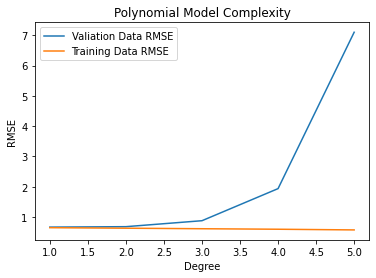

In [270]:
#11 Plot polynomial model complexity for polynomial degrees 1, 2, 3, 4, 5

plot_polynomial_model_complexity(linreg, X_train, y_train, cv=5, maxPolynomialDegree=5, learning_rate=0.001,
                                 epochs=10000, tol=1e-6, regularizer=None, lambd=0.001)

Hyperparameters we chose are Lambda=0.001, Learning rate=0.001 and Regularizer=L2-Ridge regression 

In [243]:
#12 Stochastic GD

def learningschedule(t):
        t0=5
        t1=50
        return  t0/ (t+t1)
    
class SGDRegression():
    def __init__(self,learningrate=0.01, epochs=100,tol=None,regularizer=None,lambd=0,**kwargs):
        self.learningrate=learningrate
        self.epochs=epochs
        self.tol=tol
        self.regularizer=regularizer
        self.lambd=lambd
        self.kwargs=kwargs
        
    
    def fit(self,X,y):
        m,d=X.shape
        theta_hat=np.random.randn(d)
        newJ=0
        if self.regularizer=="L1":
            for i in range(self.epochs):
                for i in range(m):
                    random_index = np.random.randint(m)
                    xi=X[random_index]
                    yi=y[random_index]
                    theta_reg=theta_hat.copy()
                    theta_reg[0]=0
                    self.learningrate=learningschedule(self.epochs*m+i)
                    theta_hat=theta_hat-self.learningrate*xi.T.dot(xi.dot(theta_hat)-yi)-((self.learningrate*self.lambd))*(np.sign(theta_reg))
                    previousJ=newJ
                    newJ=(1/2)*(yi-xi.dot(theta_hat))**2+(self.lambd/2)*np.sum(np.abs(theta_reg))
                    if abs(newJ-previousJ) < self.tol:
                        break
        
        elif self.regularizer=="L2":
            for i in range(self.epochs):
                for i in range(m):
                    random_index = np.random.randint(m)
                    xi=X[random_index]
                    yi=y[random_index]
                    theta_reg=theta_hat.copy()
                    theta_reg[0]=0
                    self.learningrate=learningschedule(self.epochs*m+i)
                    theta_hat=theta_hat-(self.learningrate)*xi.T.dot(xi.dot(theta_hat)-yi)-((self.learningrate*self.lambd))*theta_reg
                    previousJ=newJ
                    newJ=(1/2)*(yi-xi.dot(theta_hat))**2+(self.lambd/2)*np.sum(np.square(theta_reg))
                    if abs(newJ-previousJ) < self.tol:
                        break
        
        elif self.regularizer=="none":
            for i in range(self.epochs):
                for i in range(m):
                    random_index = np.random.randint(m)
                    xi=X[random_index]
                    yi=y[random_index]
                    self.learningrate=learningschedule(self.epochs*m+i)
                    theta_hat=theta_hat-(self.learningrate)*xi.T.dot(xi.dot(theta_hat)-yi)
                    newJ=(1/2)*(yi-xi.dot(theta_hat))**2
                    
                    if abs(newJ-previousJ) < self.tol:
                        break
        self.theta=theta_hat
        
    def predict(self,X):
        Y=X.dot(self.theta)
        return Y


In [254]:
#finding hyperparameters for SGD
lamb=[1,0,0.1,0.01,0.001,0.0001]
learnrate=[0.1,0.01,0.001,0.0001]
regular=["L1","L2"]

mylist=[]
#index=0
for l in lamb:
    for lr in learnrate:
        for r in regular:
            #index+=1
            #print(index)
            linreg=SGDRegression(learningrate=lr,epochs=500,tol=1e-6,regularizer=r,lambd=l)
            pred, true, trainmse, validmse =kFold(5,X_train_poly,y_train,linreg,"mse")
            mydict={"lamb":l,"learnrate":lr,"regularizer":r,"mse":validmse}
            mydict_copy=mydict.copy()
            mylist.append(mydict_copy)

validmselist=list()
bestvalidmse=list()
for i in range(len(mylist)):
    validmselist.append(mylist[i]['mse'])
bestvalidmse.append(np.nanmin(validmselist))
header=mylist[0].keys()
rows= [x.values() for x in mylist]
print(tabulate.tabulate(rows,header,tablefmt='grid'))
print("Best Valid MSE is", bestvalidmse)

+--------+-------------+---------------+----------+
|   lamb |   learnrate | regularizer   |      mse |
+========+=============+===============+==========+
| 1      |      0.1    | L1            | 1.11618  |
+--------+-------------+---------------+----------+
| 1      |      0.1    | L2            | 0.478741 |
+--------+-------------+---------------+----------+
| 1      |      0.01   | L1            | 1.14473  |
+--------+-------------+---------------+----------+
| 1      |      0.01   | L2            | 0.482421 |
+--------+-------------+---------------+----------+
| 1      |      0.001  | L1            | 1.13974  |
+--------+-------------+---------------+----------+
| 1      |      0.001  | L2            | 0.481646 |
+--------+-------------+---------------+----------+
| 1      |      0.0001 | L1            | 1.07     |
+--------+-------------+---------------+----------+
| 1      |      0.0001 | L2            | 0.48127  |
+--------+-------------+---------------+----------+
| 0      |  

Best Hyperparameters with MSE 0.47874110382002977 are Lambda=1.0, Learning rate=0.1 and Regularizer=L2(Ridge)

In [268]:
#SGD on test data

#SGD on test data for L1(Lasso)
linreg=SGDRegression(learningrate=0.1,epochs=1000,tol=1e-6,regularizer="L1",lambd=1.0)
linreg.fit(X_train_poly,y_train)
y_predl1=linreg.predict(X_test_poly)
sgdmsel1=MSE(y_predl1,y_test)

#SGD on test data for L2(Ridge)
linreg=SGDRegression(learningrate=0.1,epochs=1000,tol=1e-6,regularizer="L2",lambd=1.0)
linreg.fit(X_train_poly,y_train)
y_predl2=linreg.predict(X_test_poly)
sgdmsel2=MSE(y_predl2,y_test)

sgdmsel1,sgdmsel2

(0.9227032329596482, 0.4251462015966422)

we used lambda=1 with learning rate 0.1 with lambda 1 and regularizer L2 to get a test mse of 0.425